<a href="https://colab.research.google.com/github/SaraElizabethGarciaCajero/Proyecto-ASE-I/blob/main/Regresi%C3%B3n_SerieTiempo_ASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
%matplotlib inline     
sns.set(color_codes=True)
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing
import statsmodels.api as sm

In [ ]:
from google.colab import files #Sirve para cargar archivos desde el disco duro a google colab
uploaded = files.upload()

Saving Regresion.xlsx to Regresion.xlsx


###Regresión



In [ ]:
df=pd.read_excel("Regresion.xlsx", header=0)
df

,AÑO,Entidad Federativa,Embarazo,Pobreza,Pobreza Extrema
0,2010,Aguascalientes,18.4,31.520187,3.766106
1,2010,Baja California,20.3,30.994689,3.372998
2,2010,Baja California Sur,19.7,50.504995,4.626030
3,2010,Campeche,20.2,27.810884,13.784443
4,2010,Coahuila de Zaragoza,21.8,34.692844,2.936671
...,...,...,...,...,...
187,2020,Tamaulipas,13.8,59.287522,3.836882
188,2020,Tlaxcala,17.3,58.603154,9.843576
189,2020,Veracruz de Ignacio de la Llave,16.4,49.485626,13.939364
190,2020,Yucatán,14.4,45.770760,11.279223


In [ ]:
#Lo que hará get_dummies es que convertirá cada variable en tantas variables 0/1 como valores diferentes haya.

In [ ]:
df = pd.get_dummies(df,columns=['Entidad Federativa'],dtype=int)

In [ ]:
df.columns = ['AÑO', 'Embarazo', 'Pobreza', 'Pobreza Extrema', 'Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo', 'Morelos', 'México', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas']

In [ ]:
df.head()

,AÑO,Embarazo,Pobreza,Pobreza Extrema,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
0,2010,18.4,31.520187,3.766106,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010,20.3,30.994689,3.372998,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010,19.7,50.504995,4.626030,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,20.2,27.810884,13.784443,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010,21.8,34.692844,2.936671,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Para la regresión, coloco como mi eje Y "recta a la que se debe de acercar los ejes X" como el Embarazo, ya que apartir de esta, veré que tan confiable y cuánta confianza puedo daarle a este modelo

In [ ]:
Y = df.Embarazo
X = df.drop(['Aguascalientes','Embarazo'],axis=1)
X = sm.add_constant(X)

In [ ]:
regresion = sm.OLS(Y,X).fit()

In [ ]:
#Me da la relación que hay entre el año, embarazo y pobreza/extrema

In [ ]:
regresion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Embarazo   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     24.53
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           5.06e-47
Time:                        01:22:58   Log-Likelihood:                -249.91
No. Observations:                 192   AIC:                             569.8
Df Residuals:                     157   BIC:                             683.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1025.4458     56.097     18.280      0.000     914.643    1136.249
AÑO                                -0.4993      0.028    -18.028      0.000      -0.554      -0.445
Pobreza                            -0.0295      0.023     -1.287      0.200      -0.075       0.016
Pobreza Extrema                    -0.2411      0.041     -5.894      0.000      -0.322      -0.160
Baja California                     0.2823      0.568      0.497      0.620      -0.840       1.404
Baja California Sur                -0.4352      0.742     -0.587      0.558      -1.901       1.030
Campeche                            2.1898      0.657      3.331      0.001       0.891       3.488
Chiapas                             8.0054      1.337      5.986      0.000       5.364      10.647
Chihuahua                           3.6508      0.575      6.351      0.000       2.515       4.786
Ciudad de México                   -3.3552      0.686     -4.892      0.000      -4.710      -2.000
Coahuila de Zaragoza                3.3095      0.583      5.681      0.000       2.159       4.460
Colima                              1.1392      1.285      0.887      0.377      -1.399       3.677
Durango                             3.4666      0.704      4.928      0.000       2.077       4.856
Guanajuato                          1.1484      1.100      1.044      0.298      -1.025       3.321
Guerrero                            8.6654      1.315      6.592      0.000       6.069      11.262
Hidalgo                             2.2738      0.668      3.406      0.001       0.955       3.592
Jalisco                            -0.7303      0.722     -1.012      0.313      -2.156       0.695
Michoacán de Ocampo                 2.8380      0.819      3.465      0.001       1.220       4.456
Morelos                             1.3259      0.660      2.010      0.046       0.023       2.629
México                              1.8589      0.836      2.223      0.028       0.207       3.511
Nayarit                             2.6204      0.618      4.242      0.000       1.400       3.841
Nuevo León                         -1.1583      1.049     -1.105      0.271      -3.229       0.913
Oaxaca                              5.6778      1.336      4.248      0.000       3.038       8.318
Puebla                              3.2350      0.736      4.395      0.000       1.781       4.689
Querétaro                          -1.7935      0.615     -2.918      0.004      -3.007      -0.580
Quintana Roo                       -0.3229      0.757     -0.427      0.670      -1.817       1.172
San Luis Potosí                     1.7742      0.665      2.668      0.008       0.461       3.088
Sinaloa                             0.7476      0.573      1.304      0.194      -0

In [ ]:
X.head()

,const,AÑO,Pobreza,Pobreza Extrema,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
0,1.0,2010,31.520187,3.766106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2010,30.994689,3.372998,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,2010,50.504995,4.626030,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,2010,27.810884,13.784443,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,2010,34.692844,2.936671,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
regresion.predict([1,2022,37.2,5.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]) #Constabte,año,pobreza,pobreza extrema,estados-1

array([13.10037701])

###Serie de Tiempo

In [ ]:
from statsmodels.tsa.arima.estimators.statespace import SARIMAX


In [ ]:
emb = pd.read_csv("Embarazo94.csv")
emb.index=emb.Año
emb

,Año,Embarazo
Año,,
1994,1994,16.909073
1995,1995,16.523735
1996,1996,16.376488
1997,1997,16.333425
1998,1998,16.545697
1999,1999,16.852628
2000,2000,17.100000
2001,2001,17.200000
2002,2002,17.200000


In [ ]:
modelo = SARIMAX(emb.Embarazo,order=(2,0,0)).fit()
modelo.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Embarazo   No. Observations:                   28
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -23.744
Date:                Sat, 22 Apr 2023   AIC                             53.488
Time:                        03:18:29   BIC                             57.484
Sample:                             0   HQIC                            54.710
                                 - 28                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2430      0.180      6.897      0.000       0.890       1.596
ar.L2         -0.2436      0.177     -1.377      0.168      -0.590       0.103
sigma2         0.2483      0.050      4.936      0.000       0.150       0.347
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                29.00
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               8.84   Skew:                            -1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
modelo..

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2021    2.998402
2022    2.995941
2023    2.993483
2024    2.991026
2025    2.988572
2026    2.986120
Name: predicted_mean, dtype: float64

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


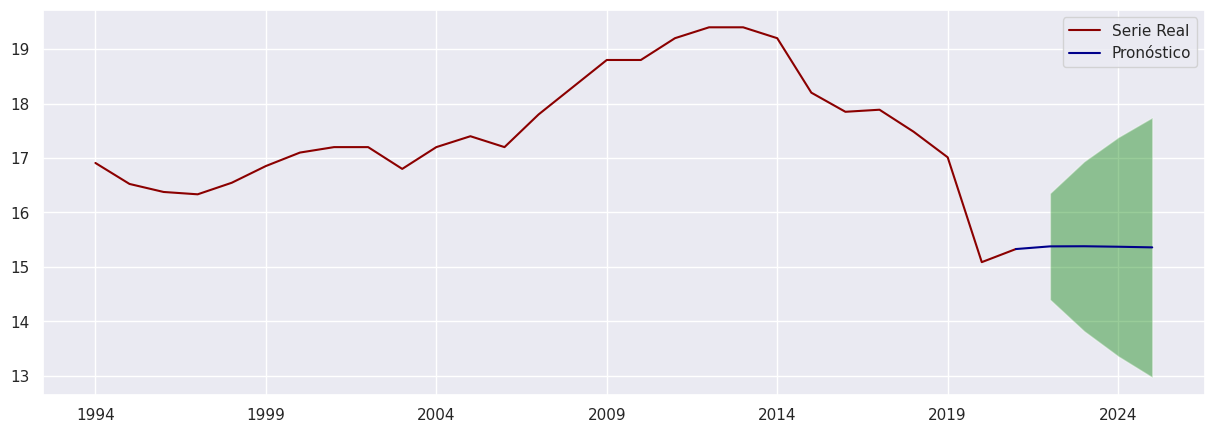

In [ ]:
forcast = modelo.forecast(4)
conf = modelo.get_forecast(4).conf_int(alpha=0.05)

date = np.array(('2022','2023','2024','2025'))
forcast.index = date
conf.index = date
conf = pd.concat((conf,forcast),axis=1)

tam = len(emb.Embarazo)
na = np.empty(tam)
na[:] = np.nan
na[-1] = emb.Embarazo.iloc[-1]
na = np.hstack((na,forcast))
date2 = np.hstack(((emb.Embarazo.index , date)))
fore = pd.DataFrame(na)
fore.index = date2
data_total2 = np.hstack((emb.Embarazo.values,np.nan,np.nan,np.nan,np.nan))
data_total2 = pd.DataFrame(data_total2)
data_total2.index = date2
pronostico = pd.concat((data_total2,fore),axis=1)
pronostico.columns = ("Serie Real","Pronóstico")

mat = np.empty((tam,3))
mat[:,:] = np.nan
mat = pd.DataFrame(mat)

IC = pd.concat((mat,conf))
IC = IC.drop([0,1,2],axis=1)
IC.index = date2

fig, axes = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(15,5), )
pronostico.plot(color=('darkred','darkblue'),ax=axes)
axes.fill_between(IC["predicted_mean"].index, IC['lower Embarazo'], IC['upper Embarazo'],facecolor='green', alpha=0.4, label='Prediction Interval')
plt.show()